#  Classification - Multiclass Logistic Regression Project
## Dhivya Murugesan

## Classifying Mushrooms as Edible or Poisonous

## Logical Regression
- Logistic regression is estimating the parameters of a logistic model; it is a form of binomial regression. Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, where the two values are labeled "0" and "1". When there are more than two values for the target variable then it is Multiclass Logistic Regression.

## Dataset: Mushroom Dataset
### Number of Instances: 8124
### Number of Attributes: 23 (All Nominal Values)

### Attribute Information: (Target: edible=e, poisonous=p, other=o)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d



In [1]:
# The code was removed by Watson Studio for sharing.

Matplotlib version:  2.1.0


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [2]:
#Analysing the description
description=dataset.describe()
print(dataset)
print(description)


      p  x  s  n  t p.1  f  c n.1  k ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0     e  x  s  y  t   a  f  c   b  k ...   s  w   w   p   w  o   p   n   n  g
1     e  b  s  w  t   l  f  c   b  n ...   s  w   w   p   w  o   p   n   n  m
2     p  x  y  w  t   p  f  c   n  n ...   s  w   w   p   w  o   p   k   s  u
3     e  x  s  g  f   n  f  w   b  k ...   s  w   w   p   w  o   e   n   a  g
4     e  x  y  y  t   a  f  c   b  n ...   s  w   w   p   w  o   p   k   n  g
5     e  b  s  w  t   a  f  c   b  g ...   s  w   w   p   w  o   p   k   n  m
6     e  b  y  w  t   l  f  c   b  n ...   s  w   w   p   w  o   p   n   s  m
7     o  x  y  w  t   p  f  c   n  p ...   s  w   w   p   w  o   p   k   v  g
8     e  b  s  y  t   a  f  c   b  g ...   s  w   w   p   w  o   p   k   s  m
9     e  x  y  y  t   l  f  c   b  g ...   s  w   w   p   w  o   p   n   n  g
10    o  x  y  y  t   a  f  c   b  n ...   s  w   w   p   w  o   p   k   s  m
11    e  b  s  y  t   a  f  c   b  w ...   s  w   w   p   w  o  

In [3]:
# Checking the value counts of my target column in original dataset
dataset['p'].value_counts()

e    4158
p    3845
o     120
Name: p, dtype: int64

# Visualization

Lets create waffle charts to visualize the number of mushrooms in each category (Edible, Poison, Unknown)

In [4]:
df_dsn=pd.DataFrame(dataset['p'].value_counts())#, columns=['category','total'])
df_dsn

,p
e,4158
p,3845
o,120


In [5]:
df_dsn.columns

Index(['p'], dtype='object')

In [6]:
df_dsn.rename(columns = {'p':'Total'}, inplace = True)
df_dsn

,Total
e,4158
p,3845
o,120


In [7]:

count=df_dsn['Total'].sum()
count

8123

In [8]:
df_dsn

,Total
e,4158
p,3845
o,120


In [9]:
category_proportions = [(float(value) / count) for value in df_dsn['Total']]

In [10]:
category_proportions

[0.51187984734703929, 0.47334728548565802, 0.014772867167302721]

Importing these proportion values into waffle chart

In [11]:
# Size of the waffle Chart
width= 40
height = 10

Total_Tiles=width*height
Total_Tiles

400

Determining the number of tiles for each category

In [12]:
tiles_per_category=[round(proportion*Total_Tiles) for proportion in category_proportions]
tiles_per_category

[205.0, 189.0, 6.0]

In [13]:
#Initialize the waffle chart as an empty matrix
waffle_chart=np.zeros((height,width))
waffle_chart

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 

In [14]:
#Define indices to loop through waffle chart

category_index=0
tile_index=0

In [15]:
#Populate the waffle chart

for col in range(width):
    for row in range(height):
        tile_index=tile_index+1
        
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles
        if tile_index>sum(tiles_per_category[0:category_index]): # if this is true we will move to next category
            category_index=category_index+1
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [16]:
waffle_chart

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 

Now the above matrix consists of 3 categories as per the mushroom category in the dataset.

Lets visualise the waffle chart

In [17]:
# Instance a new figure object
fig=plt.figure()

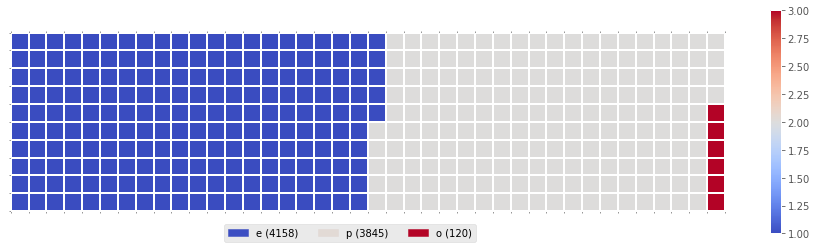

In [18]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) -1]
a=(1,0.52,2.5)

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    #color_val = colormap(float(values_cumsum[i])/total_values)
    color_val = colormap(a[i])
    
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [19]:
# The code was removed by Watson Studio for sharing.

In [20]:
# The code was removed by Watson Studio for sharing.

In [21]:
# The code was removed by Watson Studio for sharing.

# Dummy Value Encoding
Since all attributes are nominal values, i'm getting the dummy values for all the columns and dropping one of the redundant columns.

In [22]:
# Getting dummy values of independent variables
df=dataset.drop(['p'], axis=1)
X_dummy=pd.get_dummies(df, drop_first=True)
y=dataset['p']
X_dummy.describe()

,x_c,x_f,x_k,x_s,x_x,s_g,s_s,s_y,n_c,n_e,...,s.3_n,s.3_s,s.3_v,s.3_y,u_g,u_l,u_m,u_p,u_u,u_w
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,...,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,0.000492,0.388034,0.101933,0.003939,0.449957,0.000492,0.314539,0.399360,0.005417,0.184661,...,0.049243,0.153515,0.497353,0.210760,0.264434,0.102425,0.035947,0.140835,0.045180,0.023637
std,0.022187,0.487332,0.302579,0.062645,0.497520,0.022187,0.464361,0.489797,0.073403,0.388046,...,0.216388,0.360505,0.500024,0.407873,0.441059,0.303225,0.186170,0.347872,0.207712,0.151923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
## Recursive Feature Elimination
max_accu=0
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
for i in range(1, len(X_dummy.iloc[0])+1):
    selector=RFE(estimator,i, step=1)
    selector=selector.fit(X_dummy,y)
    accuracy=selector.score(X_dummy,y)
    if max_accu < accuracy:
        sel_features=selector.support_
        max_accu=accuracy
        
X=X_dummy.iloc[:, sel_features]

In [24]:
# The dummy encoding had 95 columns, after perfoming RFE there are only 82 columns.
X.describe()

,x_c,x_f,x_k,x_s,x_x,s_g,s_s,s_y,n_c,n_e,...,s.3_n,s.3_s,s.3_v,s.3_y,u_g,u_l,u_m,u_p,u_u,u_w
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,...,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,0.000492,0.388034,0.101933,0.003939,0.449957,0.000492,0.314539,0.399360,0.005417,0.184661,...,0.049243,0.153515,0.497353,0.210760,0.264434,0.102425,0.035947,0.140835,0.045180,0.023637
std,0.022187,0.487332,0.302579,0.062645,0.497520,0.022187,0.464361,0.489797,0.073403,0.388046,...,0.216388,0.360505,0.500024,0.407873,0.441059,0.303225,0.186170,0.347872,0.207712,0.151923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
#Number of columns after removing few features through RFE

print(X_dummy.columns)
print(X_dummy.shape)

Index(['x_c', 'x_f', 'x_k', 'x_s', 'x_x', 's_g', 's_s', 's_y', 'n_c', 'n_e',
       'n_g', 'n_n', 'n_p', 'n_r', 'n_u', 'n_w', 'n_y', 't_t', 'p.1_c',
       'p.1_f', 'p.1_l', 'p.1_m', 'p.1_n', 'p.1_p', 'p.1_s', 'p.1_y', 'f_f',
       'c_w', 'n.1_n', 'k_e', 'k_g', 'k_h', 'k_k', 'k_n', 'k_o', 'k_p', 'k_r',
       'k_u', 'k_w', 'k_y', 'e_t', 'e.1_b', 'e.1_c', 'e.1_e', 'e.1_r', 's.1_k',
       's.1_s', 's.1_y', 's.2_k', 's.2_s', 's.2_y', 'w_c', 'w_e', 'w_g', 'w_n',
       'w_o', 'w_p', 'w_w', 'w_y', 'w.1_c', 'w.1_e', 'w.1_g', 'w.1_n', 'w.1_o',
       'w.1_p', 'w.1_w', 'w.1_y', 'w.2_o', 'w.2_w', 'w.2_y', 'o_o', 'o_t',
       'p.3_f', 'p.3_l', 'p.3_n', 'p.3_p', 'k.1_h', 'k.1_k', 'k.1_n', 'k.1_o',
       'k.1_r', 'k.1_u', 'k.1_w', 'k.1_y', 's.3_c', 's.3_n', 's.3_s', 's.3_v',
       's.3_y', 'u_g', 'u_l', 'u_m', 'u_p', 'u_u', 'u_w'],
      dtype='object')
(8123, 95)


In [26]:
#Number of columns after removing few features through RFE

print(X.columns)
print(X.shape)

Index(['x_c', 'x_f', 'x_k', 'x_s', 'x_x', 's_g', 's_s', 's_y', 'n_c', 'n_e',
       'n_g', 'n_n', 'n_p', 'n_r', 'n_u', 'n_y', 't_t', 'p.1_c', 'p.1_f',
       'p.1_l', 'p.1_m', 'p.1_n', 'p.1_p', 'p.1_s', 'p.1_y', 'f_f', 'c_w',
       'n.1_n', 'k_e', 'k_h', 'k_n', 'k_o', 'k_p', 'k_r', 'k_u', 'k_w', 'e_t',
       'e.1_b', 'e.1_c', 'e.1_e', 'e.1_r', 's.1_k', 's.1_s', 's.1_y', 's.2_s',
       's.2_y', 'w_e', 'w_n', 'w_o', 'w_y', 'w.1_c', 'w.1_e', 'w.1_n', 'w.1_o',
       'w.1_p', 'w.1_y', 'w.2_o', 'w.2_w', 'w.2_y', 'o_o', 'o_t', 'p.3_f',
       'p.3_l', 'p.3_n', 'p.3_p', 'k.1_h', 'k.1_k', 'k.1_n', 'k.1_r', 'k.1_u',
       'k.1_w', 's.3_c', 's.3_n', 's.3_s', 's.3_v', 's.3_y', 'u_g', 'u_l',
       'u_m', 'u_p', 'u_u', 'u_w'],
      dtype='object')
(8123, 82)


## Recursive Feature Elimination

- Repeatedly creates pattern and choose the best/worst performing feature, untill all the attributes in the dataset are exhausted.
- Condition provided in RFE is to remove the attributes whose Accuracy score is less than zero.
- Columns removed are: 3_w, 9_g, 9_k, 9_y, 13_k, 14_c, 14_g, 14_p, 14_w, 15_g, 15_w, 15_y, 20_o, 20_y.
- Columns
    3. cap-color:                 brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     
    9. gill-color:                black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
                                  
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
                                  
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
                                  
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
     

In [27]:
# Splitting the data for training and testing phases.
# Since my dataset is very huge. I splitted the 50% of data for training and 50% for testing.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5, random_state=0)
print("y_train \n", y_train.value_counts())
print("y_test \n", y_test.value_counts())

y_train 
 e    2086
p    1900
o      75
Name: p, dtype: int64
y_test 
 e    2072
p    1945
o      45
Name: p, dtype: int64


In [28]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
Classification = LogisticRegression()

#Training my model
Classification.fit(X_train,y_train)

#Predicting y-values
y_pred=Classification.predict(X_test)

#Classification Score
print("Classification Score is ", Classification.score(X_test,y_test))



Classification Score is  0.98842934515


In [29]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='macro'))
print("Precision Score: ",precision_score(y_test,y_pred, average='macro'))

Confusion Matrix
 [[2072    0    0]
 [  17    0   28]
 [   2    0 1943]]
Accuracy Score:  0.98842934515
Recall Score:  0.666323907455
Precision Score:  0.658902483912


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## K-Fold Cross-Validation

In [30]:
#Splitting my X and y into k-folds
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
kf.get_n_splits(X)
kf.get_n_splits(y)
print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [1625 1626 1627 ..., 8120 8121 8122] TEST: [   0    1    2 ..., 1622 1623 1624]
TRAIN: [   0    1    2 ..., 8120 8121 8122] TEST: [1625 1626 1627 ..., 3247 3248 3249]
TRAIN: [   0    1    2 ..., 8120 8121 8122] TEST: [3250 3251 3252 ..., 4872 4873 4874]
TRAIN: [   0    1    2 ..., 8120 8121 8122] TEST: [4875 4876 4877 ..., 6496 6497 6498]
TRAIN: [   0    1    2 ..., 6496 6497 6498] TEST: [6499 6500 6501 ..., 8120 8121 8122]


In [31]:
#Finding the accuracy score for each fold and finding their mean to get the overall accuracy score
from sklearn.model_selection import cross_val_score
regr=LogisticRegression()
shuffle=KFold(n_splits=5, shuffle=True, random_state=0)
Accuracy_scores=cross_val_score(regr, X,y, cv=shuffle)

In [32]:
print ("Accuracy Scores across the k-fold: ", Accuracy_scores)
print ("Mean Accuracy Score:", Accuracy_scores.mean())

Accuracy Scores across the k-fold:  [ 0.98584615  0.99138462  0.98523077  0.97598522  0.98522167]
Mean Accuracy Score: 0.984733687003


## Conclusion:
- Each species is identified as definitely edible, definitely poisonous, or of unknown and not recommended.  
  This latter class was combined with the poisonous and edible based on the training model. But this is totally risky and 
  because of the grouping the Recall and precision scores were very low.
  
- There is no simple rule for determining the edibility of a mushroom; its a combination of several factors that determines the   edibility
